In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

Now we need two dataframes; one scaled and one unscaled.



In [2]:
df_scaled = pd.read_csv("C:\\Users\\hksid\\Downloads\\Python 3\\Files\\df_scaled.csv")
df_scaled.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,-1.234951,-0.757974,-0.911620,-1.195907,-1.082625,0.286943,0.342816,-0.167632,1,4.0,0,0.0,0,0,0,0
1,-0.418257,-0.757974,0.313245,-0.515187,-0.158988,0.719325,1.590331,-0.210935,0,2.0,0,0.0,0,0,0,0
2,-0.184916,0.925835,0.201893,-0.220209,-0.242955,-0.113502,-0.073022,-0.470751,1,1.0,1,0.0,0,0,0,0
3,1.331800,1.767740,-0.243512,0.800871,1.016549,0.682474,-0.904698,0.958239,0,3.0,1,0.0,0,1,0,1
4,-0.418257,1.178407,1.092704,-0.106755,0.092912,-0.663807,0.758655,0.178790,0,3.0,1,0.0,0,0,0,0


In [3]:
df_unscaled = pd.read_csv("C:\\Users\\hksid\\Downloads\\Python 3\\Files\\HD_nomissing.csv")
df_unscaled.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
X= df_scaled[['gender','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']].copy()
Y= df_scaled[['TenYearCHD']].copy()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

X_train.head()


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3873,1,-0.418257,5.0,0,-0.757974,0.0,0,0,0,-1.067512,0.120151,1.016549,0.255005,-1.320537,-0.124329
781,1,-1.701633,3.0,1,2.609645,0.0,0,0,0,-1.357025,-0.923619,-1.712377,-1.172347,-0.239357,-0.514054
703,0,-0.301587,3.0,0,-0.757974,0.0,0,0,0,1.293136,-1.059763,-0.872708,0.684931,0.509152,-0.167632
2675,1,-1.468292,2.0,1,1.767740,0.0,0,0,0,-1.267944,-0.038683,-0.158988,-0.199487,-0.987866,-0.557356
394,0,1.798482,2.0,0,-0.757974,0.0,0,1,0,0.446866,0.755490,1.100516,0.969910,1.174493,-0.037724


In [5]:
X1= df_unscaled[['gender','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']].copy()
Y1= df_unscaled[['TenYearCHD']].copy()

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)




In [6]:
pip install factor-analyzer

Note: you may need to restart the kernel to use updated packages.


In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_train)
chi_square_value, p_value

(13369.738357195594, 0.0)

p value is less than .05 thus, significant. Factor analysis can be done.

In [8]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(X_train)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.20602397, 1.86362445, 1.5635095 , 1.1395055 , 1.07680377,
       1.02286911, 1.00670006, 0.85982389, 0.80365121, 0.69078588,
       0.59590333, 0.4044142 , 0.37061251, 0.22609223, 0.1696804 ])

7 values are greater than 1. So there are 7 major variables. But the last one is barely 1. So we take 6.

In [9]:
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(X)
df_loading=pd.DataFrame(fa.loadings_)
df_loading.head(16)

,0,1,2,3,4,5
0,0.080880,0.218419,0.034856,-0.071296,0.809778,-0.050989
1,0.085887,-0.159497,0.042808,0.966105,0.090996,0.145910
2,-0.080925,-0.005613,-0.026034,-0.135067,0.024375,0.006378
3,-0.100082,0.867914,-0.028014,-0.065026,0.014732,-0.036351
4,-0.024501,0.870953,-0.025094,-0.054829,0.149283,-0.063927
5,0.171967,-0.006693,0.029936,0.041766,-0.045753,0.477780
6,0.018788,-0.023782,0.006690,0.018767,0.015413,0.220488
7,0.671434,-0.014422,0.024799,0.215467,-0.024949,0.277095
8,0.055152,-0.017829,0.681042,0.061248,0.001900,0.035907
9,0.158226,-0.009437,0.028161,0.238212,-0.065281,0.031478


Now, we need to find what these factors interpret into. prevalentHyp, sysBP and diaBP are correlate thus making one single factor. sysBP is kept. currentSmoker, cigsPerDay is correleated but current smoker is not related to target value, so it must be dropped. Diabetes and glucose make one factor, we keep only glucose. Gender is a single factor. BMI is a single factor. Age is a single factor.

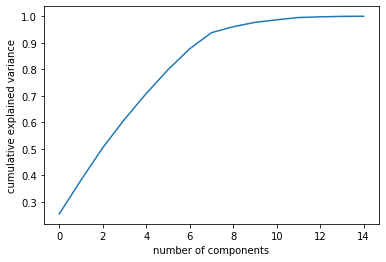

In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

6 variables account for more than 85% of the variation. 

In [11]:
print(pca.explained_variance_ratio_)

[0.25403927 0.12792589 0.12203006 0.10701447 0.09753383 0.08958121
 0.07910252 0.06081836 0.02234203 0.01654364 0.0095846  0.00868808
 0.00257984 0.00161794 0.00059827]


First component account for 25% variation, the following two 12% each and so on. 

Feature selection is a tool for removing features with low variance. 

In [12]:
from sklearn import feature_selection

sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(X_train)
train_variance.shape

(3390, 15)

No features to be removed.

Now as this is a classification problem. We can use many different methods and algorithm. 
We can take two approach. We can run regression and then remove the variables one by one. Also, we can remove the variables first, then run regression. 


First with no variable removed. 

In [13]:
accuracies_allvariable={}  #for model comparison

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
accuracies_allvariable['RandomForest']=acc
print(acc)

C:\Users\hksid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


86.32075471698113


Logistic regression can be done with both scikilearn and statpimodel. First we do using skcikitlearn. for this we need to label encode th dataset.

In [15]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_train)

print(Y)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))

      TenYearCHD
0              0
1              0
2              0
3              1
4              0
...          ...
4233           1
4234           0
4235           0
4236           0
4237           0

[4238 rows x 1 columns]
binary
binary


C:\Users\hksid\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
metrics.accuracy_score(Y_test, Y_pred)
accuracies_allvariable['Logistic Regression']=acc
acc

86.32075471698113

Now we need to find the coefficient of the variables in the regression model.

In [18]:
import numpy as np
np.exp(logistic_regression.coef_)

array([[1.77714123, 1.62312058, 0.96038793, 1.0456248 , 1.22226233,
        1.386042  , 2.31393501, 1.22228958, 1.40989165, 1.10552868,
        1.38876251, 0.93285484, 1.05309732, 0.98525904, 1.1718476 ]])

In [19]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc= svm.score(X_test,Y_test)*100

accuracies_allvariable['SVC']=acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86.20283018867924

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

acc= knn.score(X_test, Y_test)*100
accuracies_allvariable['KNN']=acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


85.49528301886792

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

acc= nb.score(X_test,Y_test)*100
accuracies_allvariable['Naive_Bayes']=acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.31132075471697

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

acc = dtc.score(X_test,Y_test)*100
accuracies_allvariable['Decision Tree'] = acc
acc

77.35849056603774

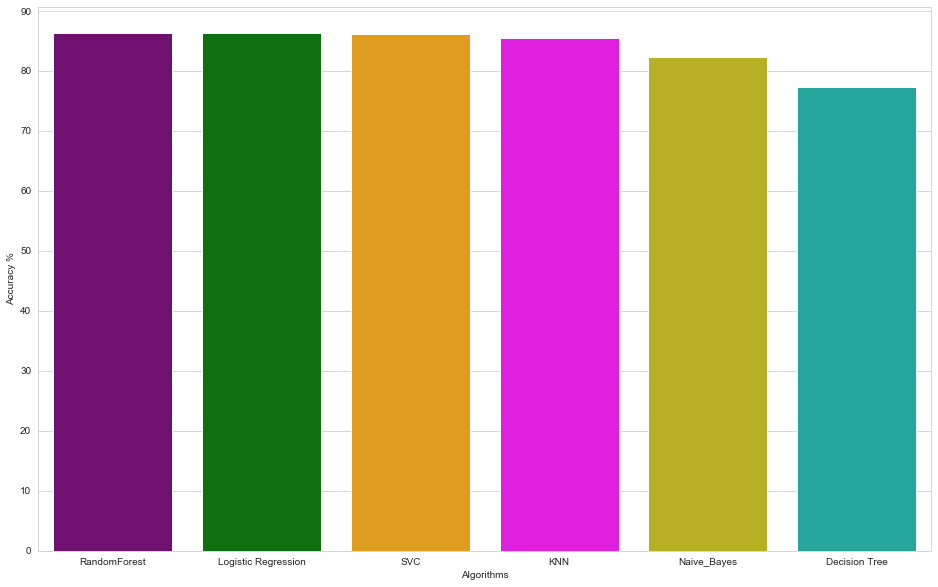

In [23]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies_allvariable.keys()), y=list(accuracies_allvariable.values()), palette=colors)
plt.show()

Now we should try to reduce the number of variables. First we would do it by backward elimination. By removing the value with highest p value. 

In [24]:
X1_train_copy=X1_train.copy()


Keeping another copy for future

In [25]:
X2_train_copy=X1_train.copy()

In [26]:
from statsmodels.discrete.discrete_model import Logit
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.403547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3375
Method:                           MLE   Df Model:                           14
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.06814
Time:                        22:53:20   Log-Likelihood:                -1368.0
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 5.308e-35
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.4664      0.107      4.371      0.000       0.257       0.676
age                 0.0244      0.006      4.007      0.000       0.012       0.036
education          -0.1553      0.045     -3.433      0.001      -0.244      -0.067
currentSmoker      -0.2084      0.154     -1.355      0.175      -0.510       0.093
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.5265      0.240      2.197      0.028       0.057       0.996
prevalentStroke     0.8468      0.477      1.775      0.076      -0.088       1.782
prevalentHyp        0.8933      0.128      6.960      0.000       0.642       1.145
diabetes            0.9374      0.298      3.149      0.002       0.354       1.521
totChol            -0.0008      0.001     -0.736      0.462      -0.003       0.001
sysBP               0.0123      0.004      3.074      0.002       0.004       0.020
diaBP              -0.0284      0.006     -4.391      0.000      -0.041      -0.016
BMI                -0.0409      0.013     -3.254      0.001      -0.066      -0.016
heartRate          -0.0199      0.004     -4.952      0.000      -0.028      -0.012
glucose             0.0023      0.002      1.072      0.284      -0.002       0.006
===================================================================================
"""

In [27]:
X1_train_copy.drop(['totChol'],axis=1,inplace=True)


In [28]:
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.403628
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3376
Method:                           MLE   Df Model:                           13
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.06796
Time:                        22:53:20   Log-Likelihood:                -1368.3
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 1.707e-35
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.4736      0.106      4.455      0.000       0.265       0.682
age                 0.0232      0.006      3.952      0.000       0.012       0.035
education          -0.1587      0.045     -3.523      0.000      -0.247      -0.070
currentSmoker      -0.2108      0.154     -1.371      0.170      -0.512       0.091
cigsPerDay          0.0178      0.006      2.858      0.004       0.006       0.030
BPMeds              0.5264      0.240      2.197      0.028       0.057       0.996
prevalentStroke     0.8544      0.477      1.792      0.073      -0.080       1.789
prevalentHyp        0.9032      0.128      7.076      0.000       0.653       1.153
diabetes            0.9432      0.298      3.169      0.002       0.360       1.526
sysBP               0.0122      0.004      3.041      0.002       0.004       0.020
diaBP              -0.0288      0.006     -4.477      0.000      -0.041      -0.016
BMI                -0.0422      0.012     -3.386      0.001      -0.067      -0.018
heartRate          -0.0204      0.004     -5.126      0.000      -0.028      -0.013
glucose             0.0022      0.002      1.040      0.298      -0.002       0.006
===================================================================================
"""

In [29]:
X1_train_copy.drop(['glucose'],axis=1,inplace=True)
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.403787
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.06759
Time:                        22:53:21   Log-Likelihood:                -1368.8
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 6.827e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.4779      0.106      4.501      0.000       0.270       0.686
age                 0.0239      0.006      4.104      0.000       0.013       0.035
education          -0.1553      0.045     -3.461      0.001      -0.243      -0.067
currentSmoker      -0.2074      0.154     -1.349      0.177      -0.509       0.094
cigsPerDay          0.0176      0.006      2.830      0.005       0.005       0.030
BPMeds              0.5295      0.239      2.214      0.027       0.061       0.998
prevalentStroke     0.8513      0.478      1.781      0.075      -0.085       1.788
prevalentHyp        0.8834      0.126      7.003      0.000       0.636       1.131
diabetes            1.1320      0.234      4.828      0.000       0.672       1.592
sysBP               0.0125      0.004      3.128      0.002       0.005       0.020
diaBP              -0.0286      0.006     -4.451      0.000      -0.041      -0.016
BMI                -0.0412      0.012     -3.320      0.001      -0.066      -0.017
heartRate          -0.0197      0.004     -5.034      0.000      -0.027      -0.012
===================================================================================
"""

In [30]:
X1_train_copy.drop(['currentSmoker'],axis=1,inplace=True)

x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.404059
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3378
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.06696
Time:                        22:53:21   Log-Likelihood:                -1369.8
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 3.761e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender              0.4794      0.106      4.521      0.000       0.272       0.687
age                 0.0241      0.006      4.124      0.000       0.013       0.035
education          -0.1564      0.045     -3.485      0.000      -0.244      -0.068
cigsPerDay          0.0114      0.004      2.687      0.007       0.003       0.020
BPMeds              0.5288      0.239      2.211      0.027       0.060       0.998
prevalentStroke     0.8527      0.478      1.784      0.074      -0.084       1.789
prevalentHyp        0.8986      0.126      7.147      0.000       0.652       1.145
diabetes            1.1366      0.234      4.851      0.000       0.677       1.596
sysBP               0.0123      0.004      3.092      0.002       0.005       0.020
diaBP              -0.0288      0.006     -4.486      0.000      -0.041      -0.016
BMI                -0.0403      0.012     -3.253      0.001      -0.065      -0.016
heartRate          -0.0203      0.004     -5.203      0.000      -0.028      -0.013
===================================================================================
"""

In [31]:
X1_train_copy.drop(['prevalentStroke'],axis=1,inplace=True)
X1ch=X1_train_copy.copy()
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result1=model.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.404505
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           10
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.06593
Time:                        22:53:21   Log-Likelihood:                -1371.3
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 3.518e-36
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gender           0.4800      0.106      4.529      0.000       0.272       0.688
age              0.0245      0.006      4.213      0.000       0.013       0.036
education       -0.1587      0.045     -3.541      0.000      -0.247      -0.071
cigsPerDay       0.0112      0.004      2.650      0.008       0.003       0.020
BPMeds           0.5762      0.237      2.436      0.015       0.113       1.040
prevalentHyp     0.9070      0.126      7.223      0.000       0.661       1.153
diabetes         1.1249      0.234      4.800      0.000       0.666       1.584
sysBP            0.0121      0.004      3.043      0.002       0.004       0.020
diaBP           -0.0285      0.006     -4.448      0.000      -0.041      -0.016
BMI             -0.0403      0.012     -3.258      0.001      -0.065      -0.016
heartRate       -0.0204      0.004     -5.238      0.000      -0.028      -0.013
================================================================================
"""

In [32]:
X1_train_copy.drop(['diaBP','heartRate','BPMeds'],axis=1,inplace=True)


In [33]:
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414578
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.04267
Time:                        22:53:21   Log-Likelihood:                -1405.4
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 6.054e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gender           0.4685      0.102      4.579      0.000       0.268       0.669
age              0.0190      0.006      3.357      0.001       0.008       0.030
education       -0.2215      0.045     -4.951      0.000      -0.309      -0.134
cigsPerDay       0.0045      0.004      1.101      0.271      -0.004       0.013
prevalentHyp     1.0931      0.120      9.134      0.000       0.859       1.328
diabetes         1.2287      0.230      5.348      0.000       0.778       1.679
sysBP           -0.0058      0.003     -2.135      0.033      -0.011      -0.000
BMI             -0.0820      0.011     -7.280      0.000      -0.104      -0.060
================================================================================
"""

In [34]:
X1_train_copy.drop(['cigsPerDay'],axis=1,inplace=True)

In [35]:
x=X1_train_copy

y=Y1_train.TenYearCHD
model=Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.414755
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.04226
Time:                        22:53:21   Log-Likelihood:                -1406.0
converged:                       True   LL-Null:                       -1468.1
Covariance Type:            nonrobust   LLR p-value:                 2.254e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gender           0.5045      0.097      5.212      0.000       0.315       0.694
age              0.0183      0.006      3.255      0.001       0.007       0.029
education       -0.2197      0.045     -4.920      0.000      -0.307      -0.132
prevalentHyp     1.0759      0.119      9.072      0.000       0.843       1.308
diabetes         1.2182      0.230      5.302      0.000       0.768       1.669
sysBP           -0.0053      0.003     -2.000      0.045      -0.011      -0.000
BMI             -0.0817      0.011     -7.260      0.000      -0.104      -0.060
================================================================================
"""

In [36]:
print(np.exp(result.params))

gender          1.656171
age             1.018453
education       0.802762
prevalentHyp    2.932675
diabetes        3.381247
sysBP           0.994671
BMI             0.921543
dtype: float64


Interpretation:

Males have 65% high risk of CHD 
An increase of 1 year age increases the risk of CHD by 1.8%. 
As level of education increases by one level, rsik drops by 20%. 
Prevalent hypertension increases the risk by 200%
Diabetes by 238%. 

But when we removed the correlated variable diaBP, BPMeds, and unrelated heartrate, cigsperday became insignificant. There is a possibility that it is factor that only affects with the presence of any other variable. 

Let's consider the model before that. 

In [37]:
print(np.exp(result1.params))

gender          1.616025
age             1.024833
education       0.853244
cigsPerDay      1.011280
BPMeds          1.779265
prevalentHyp    2.476794
diabetes        3.079995
sysBP           1.012202
diaBP           0.971881
BMI             0.960475
heartRate       0.979796
dtype: float64


1 extra cigarette per day increases the risk of CHD by 1.1%. 

Now let's run all the previous algo with this model. 

We need to make new test dataset.


In [38]:
X1_test.drop(['currentSmoker','cigsPerDay','BPMeds','prevalentStroke','totChol','diaBP','glucose'],axis=1,inplace=True)

C:\Users\hksid\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
X1_test.drop(['heartRate'],axis=1,inplace=True)

In [40]:
X1_test.head()

,gender,age,education,prevalentHyp,diabetes,sysBP,BMI
906,1,53,1.0,0,0,127.0,24.27
857,0,44,1.0,0,0,118.0,23.09
2761,0,44,4.0,0,0,109.0,17.48
108,0,66,1.0,1,0,187.0,40.52
2894,0,38,1.0,0,0,90.0,18.18


In [41]:
accuracies_reduced={}

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X1_train_copy, Y_train)

acc = rf.score(X1_test,Y_test)*100
accuracies_reduced['Random forest'] = acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


85.25943396226415

In [43]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X1_train_copy,Y_train)
Y_pred=logistic_regression.predict(X1_test)

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hksid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
acc=metrics.accuracy_score(Y_test, Y_pred)

accuracies_reduced['Logistic Regression'] = acc*100
acc

0.8584905660377359

In [45]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X1_train_copy, Y_train)

acc= svm.score(X1_test,Y_test)*100

accuracies_reduced['SVC'] = acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86.43867924528303

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(X1_train_copy, Y_train)
prediction = knn.predict(X1_test)

acc= knn.score(X1_test, Y_test)*100
accuracies_reduced['KNN'] = acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


85.37735849056604

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train_copy, Y_train)

acc= nb.score(X1_test,Y_test)*100

accuracies_reduced['Naive Bayes'] = acc
acc

C:\Users\hksid\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


81.60377358490565

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X1_train_copy, Y_train)

acc = dtc.score(X1_test,Y_test)*100
accuracies_reduced['Decision Tree'] = acc
acc


76.41509433962264

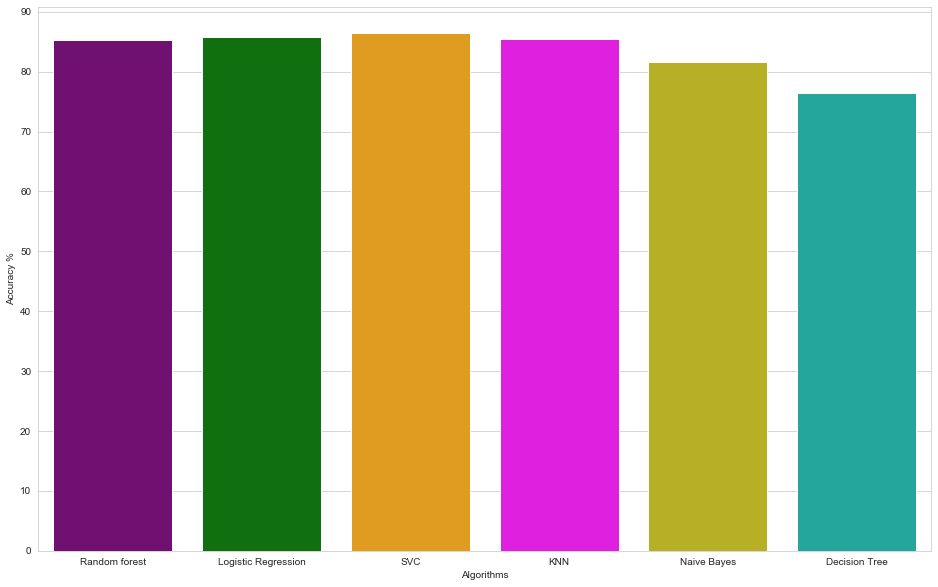

In [49]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies_reduced.keys()), y=list(accuracies_reduced.values()), palette=colors)
plt.show()

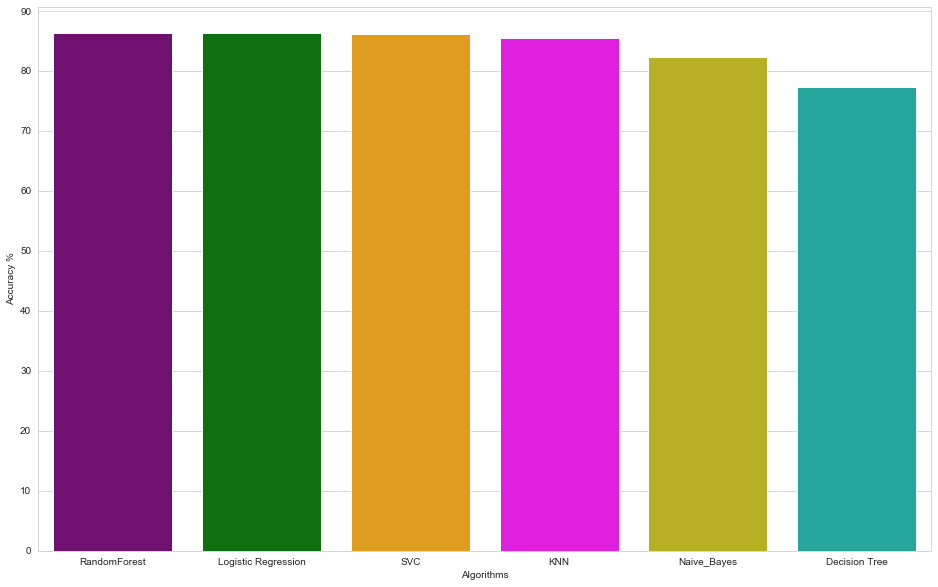

In [50]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies_allvariable.keys()), y=list(accuracies_allvariable.values()), palette=colors)
plt.show()